In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
df = pd.read_csv('final_data.csv')
df.shape
data.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.00000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.00000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.02809,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.00000,0.032901,0.115153,0.0,0.0,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.00000,0.000000,0.216346,0.0,0.0,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0


In [95]:
print(df.isna().sum(axis = 0))

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


In [96]:
df = df.drop(['player','name'], axis = 1)

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,10754.0,1.812404e+02,6.969818e+00,156.0,176.000000,1.812404e+02,1.860000e+02,2.060000e+02
age,10754.0,2.604190e+01,4.777629e+00,15.0,22.000000,2.600000e+01,2.900000e+01,4.300000e+01
appearance,10754.0,3.640701e+01,2.652654e+01,0.0,12.000000,3.500000e+01,5.900000e+01,1.070000e+02
goals,10754.0,1.255543e-01,2.355851e-01,0.0,0.000000,4.596918e-02,1.722625e-01,1.125000e+01
assists,10754.0,8.697765e-02,1.433513e-01,0.0,0.000000,4.077323e-02,1.331361e-01,4.000000e+00
yellow cards,10754.0,1.897572e-01,4.323879e-01,0.0,0.053191,1.502504e-01,2.482759e-01,3.000000e+01
second yellow cards,10754.0,4.665667e-03,2.523200e-02,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
red cards,10754.0,6.826070e-03,8.114266e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,10754.0,1.316555e-01,4.423355e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+00
clean sheets,10754.0,4.488090e-02,9.244373e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+01


In [98]:
def  outliers(df):

    rows = []
    outs = pd.DataFrame()
    for column in df.iloc[:,2:22]:
        feat_std = np.std(df[column])
        feat_mean = np.mean(df[column])
        new_df = pd.DataFrame(df.loc[:,column])
        upper_lim = feat_mean +(3*feat_std)
        lower_lim = feat_mean - (3*feat_std)
    
        for x,row in new_df.iterrows():
            if  lower_lim < row[0] < upper_lim:
                continue
            else:
                outs = outs.append(df.iloc[[x]])
                
        outs = outs.drop_duplicates(keep=False)
    
    return outs

In [99]:
outs = outliers(df)

In [100]:
data = df[ ~df.index.isin(outs.index) ]

In [101]:
data.head()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.00000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.00000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.02809,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.00000,0.032901,0.115153,0.0,0.0,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.00000,0.000000,0.216346,0.0,0.0,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0


In [102]:
grouped = data.groupby('position')['current_value'].mean().round(2)

In [103]:
grouped

position
Attack                          42553.19
Attack Centre-Forward         3716577.65
Attack-LeftWinger             4522570.53
Attack-RightWinger            3772003.03
Attack-SecondStriker          4003363.64
Defender                        57575.76
Defender Centre-Back          3243185.81
Defender Left-Back            2795942.41
Defender Right-Back           2731076.18
Goalkeeper                    1661880.39
midfield                        45357.14
midfield-AttackingMidfield    4096184.97
midfield-CentralMidfield      4018644.47
midfield-DefensiveMidfield    3335930.09
midfield-LeftMidfield         2071428.57
midfield-RightMidfield        1753092.78
Name: current_value, dtype: float64

<BarContainer object of 16 artists>

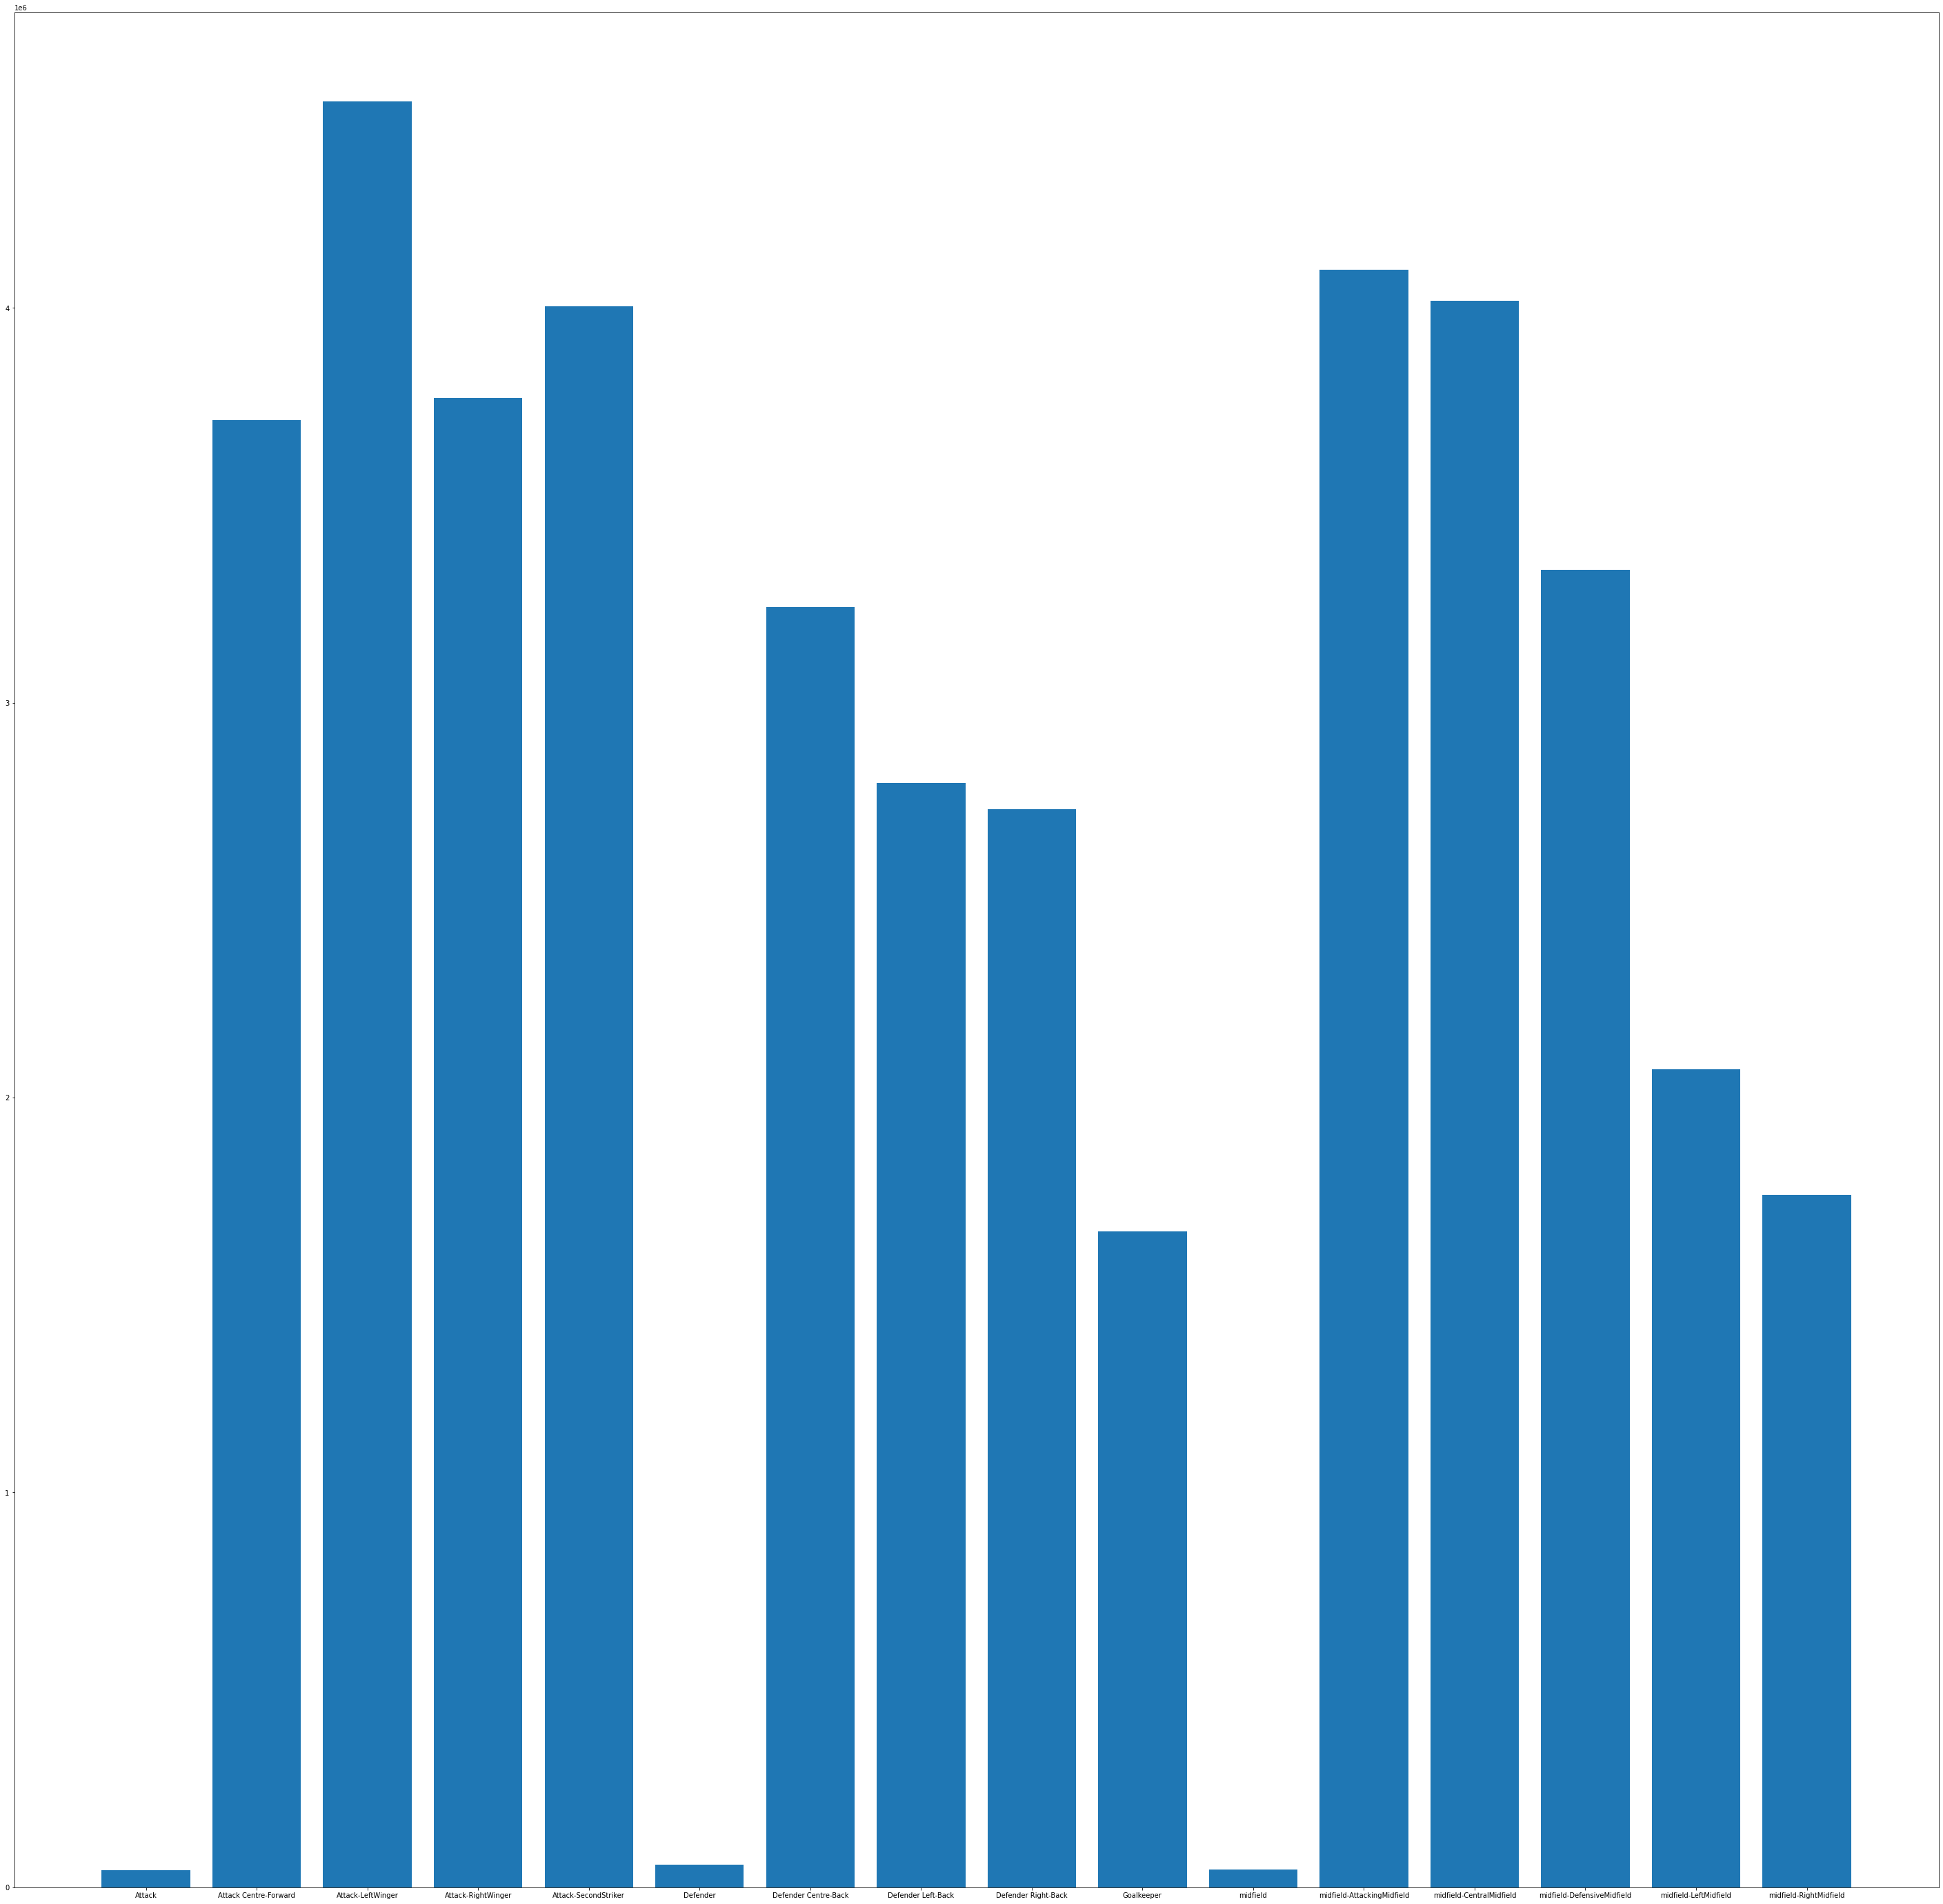

In [104]:
fig = plt.figure(figsize = [50,50])
plt.bar(grouped.index,grouped)

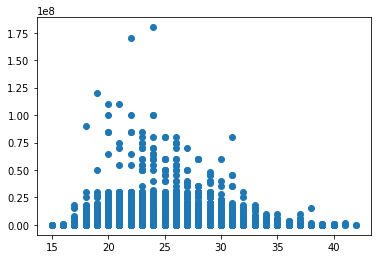

In [105]:
plt.scatter(data.age,data.current_value)

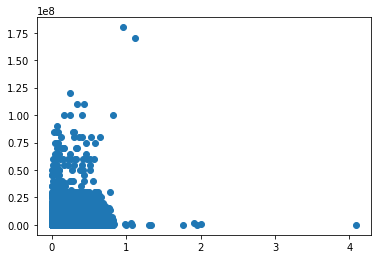

In [106]:
plt.scatter(data.goals,data.current_value)

In [107]:
X = data.drop(['current_value'], axis = 1)
y = data['current_value']

In [108]:
X = X.drop(['team','position'], axis = 1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

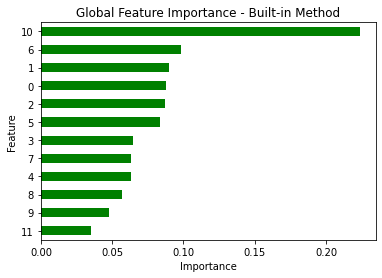

In [118]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

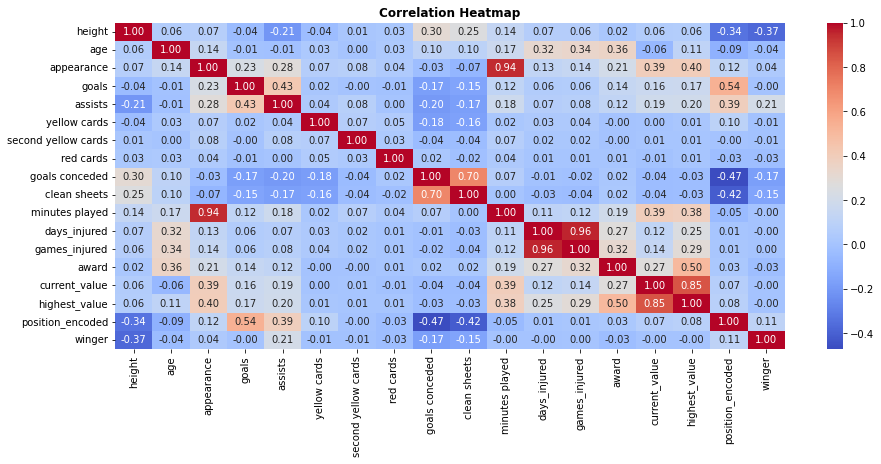

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(data.select_dtypes([int,float]).corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap',fontweight='bold')
plt.show()

In [111]:
data_new = X.drop(['winger','red cards','second yellow cards','goals conceded', 'clean sheets'], axis = 1)

In [112]:
X = data_new

In [113]:
scaler = preprocessing.StandardScaler()

In [125]:
kf = StratifiedKFold(n_splits=5)
r2_acs = []
for train_index, test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_test = pd.DataFrame(scaler.fit_transform(X_test))
    clf = RandomForestRegressor()
    clf.fit(X_train,y_train)
    preds = clf.predict(X_test)
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print("R2 score:", r2)
    r2_acs.append(r2)
    
    GB = GradientBoostingRegressor()
    GB.fit(X_train,y_train)
    preds = GB.predict(X_test)
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print("R2 score:", r2)
    r2_acs.append(r2)
    
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    preds = LR.predict(X_test)
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print("R2 score:", r2)
    r2_acs.append(r2)

/Users/thomasrowe/.local/share/virtualenvs/Dev-fNV4jyM8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Absolute Error (MAE): 1261156.2337662338
R2 score: 0.8896645620974044
Mean Absolute Error (MAE): 1234410.940816232
R2 score: 0.8829795975294783
Mean Absolute Error (MAE): 2208200.0017897994
R2 score: 0.7137915490394107
Mean Absolute Error (MAE): 1020720.1298701299
R2 score: 0.8789586985349149
Mean Absolute Error (MAE): 1094553.3662953246
R2 score: 0.8810909818754524
Mean Absolute Error (MAE): 1950905.629359793
R2 score: 0.7036100903766399
Mean Absolute Error (MAE): 873681.1948051949
R2 score: 0.9283129167315806
Mean Absolute Error (MAE): 909621.7155307799
R2 score: 0.934215634496172
Mean Absolute Error (MAE): 1793225.434461659
R2 score: 0.8175069101713801
Mean Absolute Error (MAE): 1169271.2987012987
R2 score: 0.8131868724348947
Mean Absolute Error (MAE): 1146686.1923512202
R2 score: 0.8614660478300198
Mean Absolute Error (MAE): 1993082.8663676723
R2 score: 0.7866329195314224
Mean Absolute Error (MAE): 922792.8794178794
R2 score: 0.9075706425299245
Mean Absolute Error (MAE): 98370

In [115]:
print(np.mean(r2_acs))

0.8829763255736142
